In [25]:
import tensorflow_diff_eq.diff_eq as diff_eq
import tensorflow as tf
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import tqdm


In [4]:
eq = diff_eq.DifferentialEquation()

# Define the quantities,
(psi,) = eq.generate_quantities(1)
# and the parameters
s2t = 0.92;
c2t = np.sqrt(1 - s2t**2);

In [6]:
# The Lorenz equations
eq.define_quantity(psi, np.array([1.0, 0.0, 0.0, 0.0]), 0, 1)(tf.stack([ (- c2t * psi.d(0)[2] + s2t * psi.d(0)[3])/2,
                                                                        (s2t * psi.d(0)[2] + c2t * psi.d(0)[3] )/2,
                                                                        ( c2t * psi.d(0)[0] - s2t * psi.d(0)[1] )/2   ,
                                                                        ( - s2t * psi.d(0)[0] - c2t * psi.d(0)[1] )/2 ]))


In [85]:
step_size = 0.005
num_runs = 2000
x_incre = 0.1

In [86]:

# Start tensorflow
sess = tf.Session()
sess.run(tf.global_variables_initializer())
simulate_op = eq.generate_simulate_operation(step_size)

p1rs = np.zeros(num_runs)
p2rs = np.zeros(num_runs)
p1is = np.zeros(num_runs)
p2is = np.zeros(num_runs)
xs = np.zeros(num_runs)

(p1r,p2r,p1i,p2i) = (psi.d(0)[0],psi.d(0)[1],psi.d(0)[2],psi.d(0)[3])
for i in tqdm.tqdm(range(num_runs)):
    p1rs[i] = sess.run(p1r)
    p2rs[i] = sess.run(p2r)
    p1is[i] = sess.run(p1i)
    p2is[i] = sess.run(p2i)
    if i < num_runs - 1:
        sess.run(simulate_op)
        sess.run(simulate_op)
        xs[i+1] = xs[i] + x_incre

np.save("vac_osc_tensorflow.txt", [p1rs, p2rs, p1is, p2is])

100%|██████████| 2000/2000 [00:02<00:00, 729.53it/s]


In [87]:
p1rs

array([ 1.        ,  0.99999375,  0.9999625 , ..., -0.85778789,
       -0.85509238, -0.85237546])

[  0.00000000e+00   5.00000000e-02   1.00000000e-01 ...,   9.98500000e+01
   9.99000000e+01   9.99500000e+01]


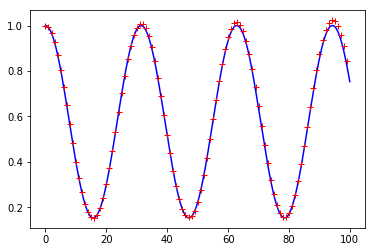

In [88]:
x_data = np.asarray(range(num_runs))*step_size/x_incre
print(x_data)

plt.plot( x_data, 1 - (s2t**2) * np.sin( x_data/2/5 )**2 , 'b-')
plt.plot( x_data[::20], (p1rs**2 + p1is**2)[::20], 'r+' )
plt.show()